# Pre-class work

We consider the eczema medical trial data set again. This time we will compare which of 2 models explain the observed data best.

* Model 1: All studies have the same probability of success.
* Model 2: A hierarchical model where the probability of success in each study is drawn from a beta prior distribution with unknown $\alpha$ and $\beta$ parameters.


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

Since we have closed-form solutions for the posteriors, we can calculate the marginal likelihood by rearranging Bayes' equation: (marginal likelihood) = (likelihood) x (prior) / (posterior).

$$ P(\text{data}) = \left[\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i) \right] \text{Beta}(\theta\,|\,\alpha_0,\beta_0) \,/\, \text{Beta}(\theta\,|\,\alpha_1,\beta_1)$$
where $\alpha_0=1$ and $\beta_0=1$ are the parameters of the prior, and $\alpha_1$ and $\beta_1$ are the parameters of the posterior beta distribution.

Since all factors involving $\theta$ cancel out, we are just left with the normalization constants of the likelihood, the prior and the posterior:

$$\begin{aligned}
P(\text{data})
&= \left[ \prod_{i=1}^6 \left(\begin{array}{c}s_i+f_i \\ s_i\end{array}\right) \right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \\
&= \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)}\right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)}
\end{aligned}$$

We usually compute the log of the marginal likelihood since the results can vary over many orders of magnitude.

**A word on notation** in the derivation above:

* The beta _distribution_ is written as $\text{Beta}(\theta \,|\, \alpha, \beta)$.
* The beta _function_ is written as $B(\alpha,\beta)$. $B$ is the Greek letter _capital beta_.
* The beta function is part of the normalization constant of the beta distribution.

This is similar to the gamma distribution and the gamma function, where

* the distribution is written as $\text{Gamma}(x \,|\, \alpha, \beta)$,
* the function is written as $\Gamma(\alpha)$,
* the gamma function is part of the normalization constant of the gamma distribution.

**A word on simplifying the expression** in the derivation above:

Just as the gamma function is related to factorials, the beta function is related to combinations:

* $n! = \Gamma(n+1)$ for integer $n$.
* $\binom{n}{k}=\left((n+1)\cdot B(n-k+1, k+1)\right)^{-1}$

The beta function can also be written in terms of the gamma function:

* $B(x,y) = \Gamma(x)\ \Gamma(y)\ /\ \Gamma(x+y)$


## Task 1

1. Take the log of the marginal likelihood above.
2. Complete the Python function below to calculate the log marginal likelihood.
3. You can use the built-in function `scipy.special.betaln(a,b)` to compute $\log \text{B}(a,b)$.

In [19]:
#import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#success count in the control groups
control = [9,11,4,21,12,0]

#size of the control groups
control_length = [15,18,10,39,29,10]

# Using the Standard Deviation as the test statistic as there is some observable variance in the dataset
def test_statistic(data):
    s_rates = []
    for i in range(len(data)):
        s_rate = data[i]/control_length[i]
        s_rates.append(s_rate)
    stdev = np.std(s_rates)
    return stdev

Real Test Statistic:  0.20795900518575364
Mean Test Statistic:  0.10854235450620583
p-val:  0.005


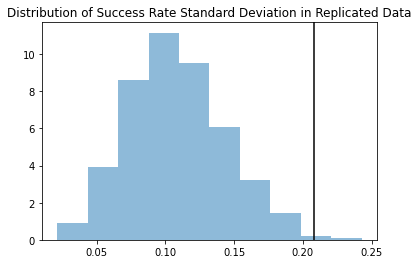

In [21]:
# Generating Posterior Samples
posterior_samples = stats.beta.rvs(a=58,b=65,size=1000)

test_statistics =[]
# creating a replicated dataset
for i in posterior_samples:
    test_total = [int(stats.binom.rvs(control_size[j],i,size=1)) for j in range(len(control_size))]
    test_statistics.append(test_statistic(test_total))
    
#descriptive stats
real_test_statistic = test_statistic(control)
print("Real Test Statistic: ",real_test_statistic)
print("Mean Test Statistic: ", np.mean(test_statistics))


plt.hist(test_statistics, alpha=0.5, density=True)
plt.title("Distribution of Success Rate Standard Deviation in Replicated Data")
plt.axvline(real_test_statistic, color='black')

p_val = sum([1 for i in test_statistics if i > real_test_statistic])/len(test_statistics)
print('p-val: ',p_val)